In [1]:
machine = 'mac'
machine = 'magny'

In [2]:
from galpy.potential import NFWPotential as NFWpot
from galpy.potential import HernquistPotential as HEpot
from galpy.potential import DoubleExponentialDiskPotential as DEpot
from galpy.potential import MiyamotoNagaiPotential as MNpot
from galpy.potential import MN3ExponentialDiskPotential as MN3pot
from galpy.potential import MWPotential2014

from galpy.potential import evaluateDensities, evaluatePotentials
from galpy.potential import plotDensities
from galpy.potential import plotRotcurve
from galpy.util import bovy_conversion

import numpy as np
from scipy import optimize as opt

from astropy import units

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind
import calcGrid

from auriga_basics import *
from auriga_functions import *

%matplotlib inline

/home/extmilan/anaconda3/lib/python3.6/site-packages/galpy-1.3.dev0-py3.6-linux-x86_64.egg/galpy/potential_src/TwoPowerSphericalPotential.py:186: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.a/r)**self.alpha/(1.+r/self.a)**(self.beta-self.alpha)/4./m.pi/self.a**3.

/home/extmilan/anaconda3/lib/python3.6/site-packages/numpy/core/function_base.py:128: RuntimeWarning: invalid value encountered in multiply
  y = y * step

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  wa

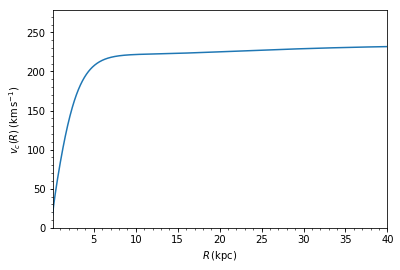

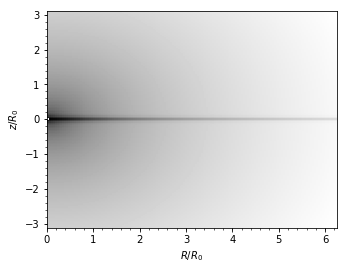

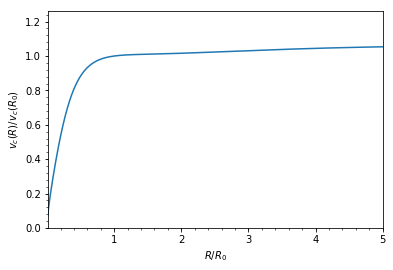

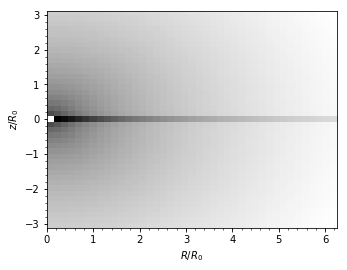

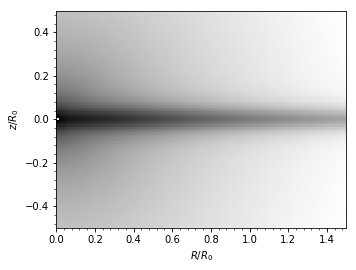

In [16]:
# galpy playtime


r0 = 8.
v0 = 220.

a_mp = 0.5 
b_mp = 0.0375 
n_mp = 0.6  
a_nfw = 4.5 
n_nfw = 0.4 
#a_he = 0.6 / 8. 
#n_he = 0.05 
x_true = [a_mp, b_mp, n_mp, a_nfw, n_nfw, v0]
mp = MNpot(a = a_mp, b = b_mp, normalize = n_mp, ro = r0, vo = v0)
nfwp = NFWpot(a = a_nfw, normalize = n_nfw, ro = r0, vo = v0)
#hep = HEpot(a = a_he, normalize = 1-(n_mp+n_nfw), ro = r0, vo = v0)
   
mp.turn_physical_on()
nfwp.turn_physical_on()
#hep.turn_physical_on()
pot = [mp,nfwp]#,hep]

plotRotcurve(pot)
plotDensities(pot, rmin = 0. * units.kpc, rmax = 50. * units.kpc, zmin = -25. * units.kpc, \
              zmax = 25. * units.kpc, log = True, nrs = 151, nzs = 151)

mp = MNpot(a = a_mp, b = b_mp, normalize = n_mp)
nfwp = NFWpot(a = a_nfw, normalize = n_nfw)
#hep = HEpot(a = a_he, normalize = 1-(n_mp+n_nfw))
   

pot2 = [mp,nfwp]#,hep]

plotRotcurve(pot2)
plotDensities(pot2, rmin = 0. * units.kpc, rmax = 50. * units.kpc, zmin = -25. * units.kpc, \
              zmax = 25. * units.kpc, log = True, nrs = 41, nzs = 41)
plotDensities(pot,nrs=101,nzs=101, log = True)

In [4]:
R = np.arange(0.1, 25.1, 0.5)
#R = R/r0
z = np.arange(-12.5, 12.5, 0.5)
#z = z/r0
pott, pott2, r = np.zeros((len(z), len(R))), np.zeros((len(z), len(R))), np.zeros((len(z), len(R)))

for ii, zii in enumerate(z):
    for jj, Rjj in enumerate(R):
        pott[ii, jj] = evaluatePotentials(pot, Rjj, zii)
        pott2[ii, jj] = evaluatePotentials(pot2, Rjj, zii)
        r[ii, jj] = np.sqrt(Rjj**2 + zii**2)

r = np.ravel(r)

print(pott)
print(pott2)

[[-112460.27623031 -112402.32395627 -112262.15503713 ...,  -76042.14984188
   -75335.20107431  -74640.62154454]
 [-114585.87640146 -114522.66624452 -114369.82888357 ...,  -76416.67797203
   -75695.43040889  -74987.2392163 ]
 [-116813.79361624 -116744.63058044 -116577.45960177 ...,  -76783.23465519
   -76047.7711332   -75326.06244413]
 ..., 
 [-119152.4679307  -119076.53295249 -118893.06820851 ...,  -77141.15475732
   -76391.59623453  -75656.50007375]
 [-116813.79361624 -116744.63058044 -116577.45960177 ...,  -76783.23465519
   -76047.7711332   -75326.06244413]
 [-114585.87640146 -114522.66624452 -114369.82888357 ...,  -76416.67797203
   -75695.43040889  -74987.2392163 ]]
[[-2.32355943 -2.32236207 -2.31946601 ..., -1.5711188  -1.55651242
  -1.5421616 ]
 [-2.36747679 -2.36617079 -2.36301299 ..., -1.57885698 -1.56395517
  -1.54932312]
 [-2.41350813 -2.41207914 -2.4086252  ..., -1.58643047 -1.57123494
  -1.5563236 ]
 ..., 
 [-2.46182785 -2.46025895 -2.45646835 ..., -1.59382551 -1.57833877


In [5]:
### finde nen Weg um das ganze von klein r abhängig zu machen 
### finde sinnvolle Standartwerte für Initialisierungs Parameter
### eventuell nur dens ODER pot ausgeben, hängt von Fit funktion ab 
### ravel works in the way I want?


#def galpy_fitting(r, R, z, r0, v0, a_mp = 0.5, b_mp = 0.0375, n_mp = 0.6, a_nfw = 4.5, n_nfw = 0.35, \
#                  a_he = 0.6 / 8., n_he = 0.05, hr_de = 0.3333333333333333, hz_de = 0.0625, \
#                  dens_fit = True, pot_fit = False):
 
def galpy_fitting(a_mp, b_mp, n_mp, a_nfw, n_nfw, v0, r = None, R = None, z = None, r0 = None):    
    
    # stell sicher dass n_mp + n_nfw + n_he = 1, zb mit 
    #n_he = 1. - (n_mp + n_nfw)
    mp = MNpot(a = a_mp, b = b_mp, normalize = n_mp)
    nfwp = NFWpot(a = a_nfw, normalize = n_nfw)
    #hep = HEpot(a = a_he, normalize = n_he)
    pot = [mp, nfwp]#, hep]         
    pot_mod = np.zeros((len(z), len(R)))
    for ii, zii in enumerate(z):
        for jj, Rjj in enumerate(R):
            pot_mod[ii, jj] = evaluatePotentials(pot, Rjj, zii)
    return pot_mod

# FITTING

def RMS(x, r, R, z, N, pot, r0):
    a_mp, b_mp, n_mp, a_nfw, n_nfw, v0 = x[0], x[1], x[2], x[3], x[4], x[5]#, #x[6] #a_he
    ydata = pot
    ymodel = galpy_fitting(a_mp, b_mp, n_mp, a_nfw, n_nfw, v0, r, R, z, r0)
    RMS = np.sqrt(1./N*np.sum((ydata - ymodel)**2))
    #RMS = np.sum((ydata - ymodel)**2/(ydata**2))
    print(RMS)
    print(a_mp, b_mp, n_mp, a_nfw, n_nfw, v0)
    return RMS

a_mp = 0.5 
b_mp = 0.1#0.0375 
n_mp = 0.6  
a_nfw = 3 #4.5 
n_nfw = 0.35 
#a_he = 0.6 / 8. 
#n_he = 0.05 

v0 = 220.

pot = pott2
#, R, z = rand_r_dm, rand_R_dm, rand_z_dm
x0 = (a_mp, b_mp, n_mp,  a_nfw , n_nfw , v0) #n_he, a_he

bounds = ((0., None), (0., None), (0., 0.999), (0., None), (0., 0.999), (0., None))#, (0., None)) #n_he
#r, R, z, rho = R, Rbin, z, rho
#rho, R, z, vol = fitting_dens(s)

r0 = 8.
N = len(r)
# v0 muss mitgefittet werden
print(x_true)
cons = ({'type': 'eq', 'fun': lambda x:  1. - (x[2] + x[4] )})

res = opt.minimize(RMS, x0 = x0, args= (r, R, z, N, pot, r0), bounds = bounds, constraints = cons)


[0.5, 0.0375, 0.6, 4.5, 0.4, 220.0]
1.02045626638
0.5 0.1 0.6 3.0 0.35 220.0
1.02045626638
0.5 0.1 0.6 3.0 0.35 220.0
1.0204562647
0.500000014901 0.1 0.6 3.0 0.35 220.0
1.02045626453
0.5 0.100000014901 0.6 3.0 0.35 220.0
1.02045626399
0.5 0.1 0.600000014901 3.0 0.35 220.0
1.02045625937
0.5 0.1 0.6 3.0000000149 0.35 220.0
1.02045621299
0.5 0.1 0.6 3.0 0.350000014901 220.0
1.02045626638
0.5 0.1 0.6 3.0 0.35 220.000000015
1.86037722698
0.613155856729 0.224100342393 0.001 3.47042927146 0.999 220.0
0.0767303526023
0.542905287567 0.147055106395 0.372877268612 3.17837258941 0.596081223157 220.0
0.0767303526023
0.542905287567 0.147055106395 0.372877268612 3.17837258941 0.596081223157 220.0
0.0767303527289
0.542905302468 0.147055106395 0.372877268612 3.17837258941 0.596081223157 220.0
0.0767303528777
0.542905287567 0.147055121296 0.372877268612 3.17837258941 0.596081223157 220.0
0.0767303532434
0.542905287567 0.147055106395 0.372877283513 3.17837258941 0.596081223157 220.0
0.0767303487842
0.542

0.0149384645133
0.0538350961308 0.328328666922 0.578370272932 4.31309868473 0.421629741969 220.0
0.0149384878141
0.0538350961308 0.328328666922 0.578370272932 4.31309868473 0.421629727068 220.000000015
0.0143201533037
0.083599854368 0.317770053171 0.587547947511 4.41503779316 0.412452052489 220.0
0.0126764889781
0.0699140767478 0.322624883122 0.58332807069 4.36816639049 0.41667192931 220.0
0.0126764889781
0.0699140767478 0.322624883122 0.58332807069 4.36816639049 0.41667192931 220.0
0.0126764888759
0.069914091649 0.322624883122 0.58332807069 4.36816639049 0.41667192931 220.0
0.0126764892779
0.0699140767478 0.322624898024 0.58332807069 4.36816639049 0.41667192931 220.0
0.0126764909121
0.0699140767478 0.322624883122 0.583328085592 4.36816639049 0.41667192931 220.0
0.0126764909355
0.0699140767478 0.322624883122 0.58332807069 4.36816640539 0.41667192931 220.0
0.0126765115239
0.0699140767478 0.322624883122 0.58332807069 4.36816639049 0.416671944211 220.0
0.0126764889781
0.0699140767478 0.32

0.000652456593227
0.533773690479 0.0199329364659 0.600922900544 4.50631321498 0.399077114357 220.0
0.000652457421402
0.533773690479 0.0199329364659 0.600922885643 4.50631322988 0.399077114357 220.0
0.000652458880333
0.533773690479 0.0199329364659 0.600922885643 4.50631321498 0.399077129258 220.0
0.000652457140237
0.533773690479 0.0199329364659 0.600922885643 4.50631321498 0.399077114357 220.000000015
0.0118326551038
0.231933642966 0.0829730212084 0.582710283024 4.37443756044 0.417289716976 220.0
0.000725971456121
0.485018940699 0.0301154936946 0.597981092826 4.4850119841 0.402018907174 220.0
0.000388662675293
0.511312354447 0.0246240453447 0.599567600316 4.49649972795 0.400432399684 220.0
0.000388662675293
0.511312354447 0.0246240453447 0.599567600316 4.49649972795 0.400432399684 220.0
0.000388662581355
0.511312369348 0.0246240453447 0.599567600316 4.49649972795 0.400432399684 220.0
0.000388662114789
0.511312354447 0.0246240602459 0.599567600316 4.49649972795 0.400432399684 220.0
0.000

2.56330373741e-05
0.500295985122 0.0378381005973 0.600089117117 4.50070191126 0.399910897784 220.0
2.56839354456e-05
0.500295985122 0.0378381005973 0.600089117117 4.50070191126 0.399910882883 220.000000015
0.000106056987772
0.501676338354 0.0352869446578 0.599844681405 4.49881127357 0.400155318595 220.0
1.96360083964e-05
0.500691650782 0.0371068350224 0.60001905185 4.50015997721 0.39998094815 220.0
1.96360083964e-05
0.500691650782 0.0371068350224 0.60001905185 4.50015997721 0.39998094815 220.0
1.96370864051e-05
0.500691665683 0.0371068350224 0.60001905185 4.50015997721 0.39998094815 220.0
1.96369157983e-05
0.500691650782 0.0371068499236 0.60001905185 4.50015997721 0.39998094815 220.0
1.96368943526e-05
0.500691650782 0.0371068350224 0.600019066751 4.50015997721 0.39998094815 220.0
1.96421559746e-05
0.500691650782 0.0371068350224 0.60001905185 4.50015999211 0.39998094815 220.0
1.96936583199e-05
0.500691650782 0.0371068350224 0.60001905185 4.50015997721 0.399980963051 220.0
1.96360083964e

In [6]:
print(res)
print(x_true)


     fun: 4.541761515180941e-06
     jac: array([ 0.00668531,  0.02248624,  0.0813603 ,  0.15952767,  1.66862473,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 290
     nit: 33
    njev: 33
  status: 0
 success: True
       x: array([  4.99890785e-01,   3.75909965e-02,   6.00004307e-01,
         4.50003570e+00,   3.99995693e-01,   2.20000000e+02])
[0.5, 0.0375, 0.6, 4.5, 0.4, 220.0]


In [8]:
a_mp, b_mp, n_mp = res.x[0], res.x[1], res.x[2]
a_nfw , n_nfw = res.x[3]  , res.x[4]
#a_he, n_he = res.x[5],  res.x[6]

In [10]:

mp = MNpot(a = a_mp, b = b_mp, normalize = n_mp, ro = r0, vo = v0)
nfwp = NFWpot(a = a_nfw, normalize = n_nfw, ro = r0, vo = v0)
#hep = HEpot(a = a_he, normalize = 1-(n_mp+n_nfw), ro = r0, vo = v0)
    
pot = [mp,nfwp]#,hep]



/home/extmilan/anaconda3/lib/python3.6/site-packages/galpy-1.3.dev0-py3.6-linux-x86_64.egg/galpy/potential_src/TwoPowerSphericalPotential.py:186: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.a/r)**self.alpha/(1.+r/self.a)**(self.beta-self.alpha)/4./m.pi/self.a**3.

/home/extmilan/anaconda3/lib/python3.6/site-packages/numpy/core/function_base.py:128: RuntimeWarning: invalid value encountered in multiply
  y = y * step

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  wa

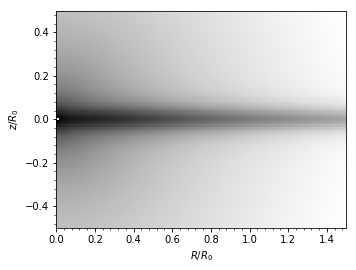

In [14]:
plotDensities(pot,nrs=101,nzs=101, log = True)